In [1]:
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys
import time

start_time = time.time()

inbinfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/genepromdelta.7/differentdelta/CD4geneprom.7mixture_output_mdadded_sorted_softMultiprocessing_nodupindex_binnedstats.pkl'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_pickle(inbinfile)
scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']


inbindf.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
CD4.HWI-7001432L_73:1:1104:7170:7695#12,0.701154,0.380590,-0.331256,-0.299308,-0.367154,-0.325154,0.461538,-0.310436,-0.358000,0.548769,...,1.0,0.0,1.0,1.000000,CD4-others,0.701154,CD4-others,0.701154,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1110:19229:7607#12,-0.109949,-0.092239,-0.091761,-0.071060,0.245556,0.170171,-0.103308,0.214205,0.179026,-0.100615,...,1.0,2.0,3.0,0.333333,Mn-others,0.736667,Mn-others,0.245556,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1112:14465:76613#12,0.723218,0.664705,-0.285859,0.175782,-0.280474,-0.298423,0.040808,-0.264679,-0.259115,0.190500,...,1.0,0.0,1.0,1.000000,CD4-others,0.723218,CD4-others,0.723218,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1202:17531:10462#12,-0.139724,-0.111006,-0.116929,-0.117647,0.370737,0.315814,-0.128686,0.306840,0.059776,-0.145378,...,1.0,1.0,2.0,0.500000,Mn-others,0.741474,Mn-others,0.370737,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1203:15150:70005#12,-0.060855,-0.074137,-0.061573,-0.059538,0.279812,0.033915,-0.042368,0.262402,-0.022803,-0.074137,...,1.0,2.0,3.0,0.333333,Mn-others,0.839436,Mn-others,0.279812,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...


In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
CD4.HWI-7001432L_73:1:1104:7170:7695#12,0.701154,0.380590,-0.331256,-0.299308,-0.367154,-0.325154,0.461538,-0.310436,-0.358000,0.548769,...,1.0,0.0,1.0,1.000000,CD4-others,0.701154,CD4-others,0.701154,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1110:19229:7607#12,-0.109949,-0.092239,-0.091761,-0.071060,0.245556,0.170171,-0.103308,0.214205,0.179026,-0.100615,...,1.0,2.0,3.0,0.333333,Mn-others,0.736667,Mn-others,0.245556,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1112:14465:76613#12,0.723218,0.664705,-0.285859,0.175782,-0.280474,-0.298423,0.040808,-0.264679,-0.259115,0.190500,...,1.0,0.0,1.0,1.000000,CD4-others,0.723218,CD4-others,0.723218,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1202:17531:10462#12,-0.139724,-0.111006,-0.116929,-0.117647,0.370737,0.315814,-0.128686,0.306840,0.059776,-0.145378,...,1.0,1.0,2.0,0.500000,Mn-others,0.741474,Mn-others,0.370737,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...
CD4.HWI-7001432L_73:1:1203:15150:70005#12,-0.060855,-0.074137,-0.061573,-0.059538,0.279812,0.033915,-0.042368,0.262402,-0.022803,-0.074137,...,1.0,2.0,3.0,0.333333,Mn-others,0.839436,Mn-others,0.279812,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...


In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT
CD4.HWI-7001432L_73:1:1104:7170:7695#12,0.701154,0.380590,-0.331256,-0.299308,-0.367154,-0.325154,0.461538,-0.310436,-0.358000,0.548769,...,1.0,1.000000,CD4-others,0.701154,CD4-others,0.701154,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1110:19229:7607#12,-0.109949,-0.092239,-0.091761,-0.071060,0.245556,0.170171,-0.103308,0.214205,0.179026,-0.100615,...,3.0,0.333333,Mn-others,0.736667,Mn-others,0.245556,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1112:14465:76613#12,0.723218,0.664705,-0.285859,0.175782,-0.280474,-0.298423,0.040808,-0.264679,-0.259115,0.190500,...,1.0,1.000000,CD4-others,0.723218,CD4-others,0.723218,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1202:17531:10462#12,-0.139724,-0.111006,-0.116929,-0.117647,0.370737,0.315814,-0.128686,0.306840,0.059776,-0.145378,...,2.0,0.500000,Mn-others,0.741474,Mn-others,0.370737,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Notassigned,Notassigned
CD4.HWI-7001432L_73:1:1203:15150:70005#12,-0.060855,-0.074137,-0.061573,-0.059538,0.279812,0.033915,-0.042368,0.262402,-0.022803,-0.074137,...,3.0,0.333333,Mn-others,0.839436,Mn-others,0.279812,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Notassigned,Notassigned


In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,Tr-others,...,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg
CD4.HWI-7001432L_73:1:1104:7170:7695#12,0.701154,0.380590,-0.331256,-0.299308,-0.367154,-0.325154,0.461538,-0.310436,-0.358000,0.548769,...,CD4-others,0.701154,CD4-others,0.701154,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,0.604769,m4-others,0.0963846,0.398769
CD4.HWI-7001432L_73:1:1110:19229:7607#12,-0.109949,-0.092239,-0.091761,-0.071060,0.245556,0.170171,-0.103308,0.214205,0.179026,-0.100615,...,Mn-others,0.736667,Mn-others,0.245556,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,0.214205,DC-others,0.0313504,0.138453
CD4.HWI-7001432L_73:1:1112:14465:76613#12,0.723218,0.664705,-0.285859,0.175782,-0.280474,-0.298423,0.040808,-0.264679,-0.259115,0.190500,...,CD4-others,0.723218,CD4-others,0.723218,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,0.664705,CD8-others,0.0585128,0.390865
CD4.HWI-7001432L_73:1:1202:17531:10462#12,-0.139724,-0.111006,-0.116929,-0.117647,0.370737,0.315814,-0.128686,0.306840,0.059776,-0.145378,...,Mn-others,0.741474,Mn-others,0.370737,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,0.315814,mNeu-others,0.0549231,0.21283
CD4.HWI-7001432L_73:1:1203:15150:70005#12,-0.060855,-0.074137,-0.061573,-0.059538,0.279812,0.033915,-0.042368,0.262402,-0.022803,-0.074137,...,Mn-others,0.839436,Mn-others,0.279812,Mn-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,0.262402,DC-others,0.0174103,0.148611


In [7]:
allassigned.columns

Index(['CD4-others', 'CD8-others', 'nB-others', 'NK-others', 'Mn-others',
       'mNeu-others', 'm8-others', 'DC-others', 'Eo-others', 'Tr-others',
       'm4-others', 'Mg-others', 'Er-others', 'mB-others', 'LENhypoCpG',
       'LENhyperCpG', 'total_cpg', 'LENhypoCpG_BY_total_cpg',
       'maxscoredCT_beforeCpGweight', 'maxscore_beforeCpGweight',
       'maxscoredCT', 'maxscore', 'deltabasedfragassignment', 'filename',
       'secondmaxScore', 'secondmaxScoreCT', 'adjustedScore_minus',
       'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:




def calculate_metrics(currentgroup,currentmethods):
    for name, group in currentgroup:
   
        celltype=name.replace('-others','')





        y=(group.index.str.contains(celltype)).astype(int) 


        for method in currentmethods:

            pred=(group[method]).to_numpy()


            fpr, tpr, thresholds=metrics.roc_curve(y,pred,pos_label=1)


            tempAUC=metrics.auc(fpr, tpr)

            celltypeAUC[celltype]=celltypeAUC[celltype]+[tempAUC]

            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            celltypeoptcutpoint[celltype]=celltypeoptcutpoint[celltype]+[optimal_threshold]

In [13]:



celltypeAUC=defaultdict(list)
celltypeoptcutpoint=defaultdict(list)


allassignedgrouped=allassigned.groupby('deltabasedfragassignment')


methods=['maxscore','adjustedScore_minus','adjustedScore_minus_avg','LENhypoCpG','LENhypoCpG_0.5','LENhypoCpG_0.8']

calculate_metrics(allassignedgrouped,methods)




In [14]:
celltypeAUCdf=pd.DataFrame.from_dict(celltypeAUC, orient='index',columns=methods)
celltypeAUCdf.index.name = 'Celltype'
celltypeAUCdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.789837,0.790325,0.792633,0.779017,0.780564,0.781970
CD8,0.806456,0.804069,0.812085,0.790385,0.802399,0.807051
DC,0.875078,0.860579,0.875315,0.857611,0.865275,0.869409
Eo,0.958803,0.957964,0.958344,0.948688,0.953088,0.958171
Er,0.911336,0.905261,0.911791,0.893678,0.899354,0.900219


In [15]:
celltypeoptcutpointdf=pd.DataFrame.from_dict(celltypeoptcutpoint, orient='index',columns=methods)
celltypeoptcutpointdf.index.name = 'Celltype'
celltypeoptcutpointdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.385603,3.948718e-03,0.252968,1.0,1.0,1.0
CD8,0.700192,1.902564e-02,0.365596,1.0,1.0,1.0
DC,0.700141,7.179487e-04,0.352224,1.0,1.0,1.0
Eo,0.900026,3.778205e-01,0.510878,1.0,1.0,1.0
Er,0.411955,2.220446e-16,0.354519,1.0,1.0,1.0


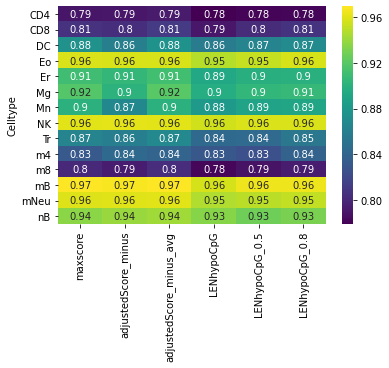

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(celltypeAUCdf, annot=True,cmap='viridis')
plt.savefig(outfile+"_Allheyper"+str(consideringALLheyper)+"_AUC.pdf",bbox_inches = "tight")

In [17]:
celltypeAUCdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_AUC.txt",sep="\t")
celltypeoptcutpointdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_Cutpoint.txt",sep="\t")

In [18]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)


2.8731629848480225
